In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
import json

#This will control the size of the charts in the enite workbook (unless changed in the chart below) and is very cool
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 9]

Below is a short description of the Happiness index and where the ranking come from.  Most of the contributer columns (outside of GDP and life expectancy) seem "soft".  Perhaps some "hard" data from the World Development Indicators would tell a different story.

"The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. ... The columns following the happiness score estimate the extent to which each of six factors – **economic production, social support, life expectancy, freedom, absence of corruption, and generosity** – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. *They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.*"

# Areas where I wanted the project to go but was unable to do so:

1) Randomly pull World Bank information from the API for comparison to the World Happiness data.  I was unable to get the API to work.  Richard helped me create the below, but by the time we figured it out I was out of time to build the loop and had moved on to pulling the CSV data.

2) Going through the World Bank data there were many questions that were interesting but did not contain full data for every country.  I would up having to choose questions that had enough data.

3) My initial idea was to try and create a new happiness index using the information from the World Bank.  I wanted to create the same scores that the happiness index uses but with significantly more information; especially including social, environmental, and attitudinal data.

4) I created a map with the Lat/Lug of the Top 10/Bottom 10 but in the end deleted it because I felt like it really wasn't adding anything to the report.  Top 10 are mostly in Europe and bottom ten are mostly in Africa.

What I’ve presented is what was left after trying and failing to create a much more ambitious project 

Select data from the World Bank.

Unfortunately, many of the "interesting" questions just don't have enough data available.  For example, women's attitudes about domestic violence or even Literacy rates are just not available for most countries for most years

I've deleted a lot of the code that I used for areas where I failed to answer a question or was unable to create what I wanted to create.

In [3]:
# I can't pull the information by API
query_url = "https://api.worldbank.org/v2/country/All/indicator/NY.GDP.MKTP.CD?format=json&per_page=2000&date=2017"

print(query_url)

response = requests.get(query_url)
response_json = response.json()
pprint(response_json)

https://api.worldbank.org/v2/country/All/indicator/NY.GDP.MKTP.CD?format=json&per_page=2000&date=2017
[{'lastupdated': '2020-04-09',
  'page': 1,
  'pages': 1,
  'per_page': 2000,
  'sourceid': '2',
  'total': 264},
 [{'country': {'id': '1A', 'value': 'Arab World'},
   'countryiso3code': 'ARB',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 2586506133266.57},
  {'country': {'id': 'S3', 'value': 'Caribbean small states'},
   'countryiso3code': 'CSS',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 69602182809.4116},
  {'country': {'id': 'B8', 'value': 'Central Europe and the Baltics'},
   'countryiso3code': 'CEB',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 145718

   'value': 6770532818.53282},
  {'country': {'id': 'IL', 'value': 'Israel'},
   'countryiso3code': 'ISR',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 353253406954.97},
  {'country': {'id': 'IT', 'value': 'Italy'},
   'countryiso3code': 'ITA',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 1956960611690.59},
  {'country': {'id': 'JM', 'value': 'Jamaica'},
   'countryiso3code': 'JAM',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 14806340821.0871},
  {'country': {'id': 'JP', 'value': 'Japan'},
   'countryiso3code': 'JPN',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': ''

   'value': 1309631135.2273},
  {'country': {'id': 'SO', 'value': 'Somalia'},
   'countryiso3code': 'SOM',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 4508845348.32757},
  {'country': {'id': 'ZA', 'value': 'South Africa'},
   'countryiso3code': 'ZAF',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': 349554116683.818},
  {'country': {'id': 'SS', 'value': 'South Sudan'},
   'countryiso3code': 'SSD',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': '',
   'value': None},
  {'country': {'id': 'ES', 'value': 'Spain'},
   'countryiso3code': 'ESP',
   'date': '2017',
   'decimal': 0,
   'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
   'obs_status': '',
   'unit': ''

It looks like data for 2018 and 2019 is thin.  2017 looks like it has the fullest data (and 2016).  I'm pulling 2017

In [4]:
# load world development indicators - Questions with sufficient data
worldbank_df = pd.read_csv('world-bank/WBD.csv')

# Happiness data from 2017
happy17_df= pd.read_csv('world-happiness/2017.csv')

# cleaning some NA rows
worldbank_df = worldbank_df.dropna(how='any')

# creating dateframe of just 2017
wb17 = worldbank_df[worldbank_df['Time Code'] != "YR2016"]

# remove a few columns we don't need and rename country
wb17 = wb17.drop(columns=['Time', 'Time Code', 'Country Code'])
wb17.rename(columns = {'Country Name':'Country'}, inplace = True)

# also dropping some of the columns in the Happiness data
happy17_df = happy17_df.drop(columns=['Whisker.high', 'Whisker.low'])
# renameing some columns (for cleaner labels)
happy17_df = happy17_df.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                                       'Economy..GDP.per.Capita.': 'Economy-GDP per Capita', 
                                        'Health..Life.Expectancy.': 'Health-Life Expectancy'})
# lazy Frank is only changing the ones he needs for labels here (I had a loop but accedently deleted)
wb17 = wb17.rename(columns={'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]': 'GDP per capita, PPP',
                            'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life expectancy at birth (years)',
                           'Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS]':'Tax revenue (% of GDP)',
                           'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]':'Exports of goods and services (% of GDP)',
                           'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]':'Imports of goods and services (% of GDP)',
                           'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]':'Fertility rate, total (births per woman)',
                           'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]':'Mobile cellular subscriptions (per 100 people)',
                           'Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]':'Terrestrial and marine protected areas (% of total territorial area)',
                           'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]':'Inflation, GDP deflator (annual %)',
                           'Urban population growth (annual %) [SP.URB.GROW]':'Urban population growth (annual %)'})

# reducing number of countries to just those within the Happiness index
# merge dataframes removing countries not in Happiness rank (keeping only those in both) and keeping ranks
working_data = pd.merge(happy17_df, wb17, on="Country")
working_data.count()

Country                                                                                            138
Happiness Rank                                                                                     138
Happiness Score                                                                                    138
Economy-GDP per Capita                                                                             138
Family                                                                                             138
Health-Life Expectancy                                                                             138
Freedom                                                                                            138
Generosity                                                                                         138
Trust..Government.Corruption.                                                                      138
Dystopia.Residual                                                        

In [5]:
# dataframes of Top 10 and bottom 10 countries for simplicity
happiest = working_data.head(10)
saddest = working_data.tail(10)
t_and_b = pd.concat([happiest, saddest])

In [6]:
# cheating to look at r values ahead of running data in charts
working_data.corr()

,Happiness Rank,Happiness Score,Economy-GDP per Capita,Family,Health-Life Expectancy,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]",...,"Prevalence of HIV, total (% of population ages 15-49) [SH.DYN.AIDS.ZS]","Revenue, excluding grants (% of GDP) [GC.REV.XGRT.GD.ZS]","School enrollment, primary (% gross) [SE.PRM.ENRR]","School enrollment, primary and secondary (gross), gender parity index (GPI) [SE.ENR.PRSC.FM.ZS]","School enrollment, secondary (% gross) [SE.SEC.ENRR]",Surface area (sq. km) [AG.SRF.TOTL.K2],Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days) [IC.REG.DURS],Urban population growth (annual %)
Happiness Rank,1.000000,-0.992681,-0.822233,-0.735346,-0.795417,-0.559307,-0.157497,-0.427619,-0.489357,0.613834,...,0.365916,-0.387893,-0.284121,-0.413988,-0.650196,-0.175562,-0.291415,-0.081872,0.238533,0.526405
Happiness Score,-0.992681,1.000000,0.823337,0.752971,0.797790,0.576812,0.178829,0.451096,0.478296,-0.612921,...,-0.358917,0.405959,0.287828,0.408354,0.648626,0.182290,0.315732,0.085866,-0.236959,-0.511442
Economy-GDP per Capita,-0.822233,0.823337,1.000000,0.734344,0.842684,0.393127,-0.018522,0.363766,0.041626,-0.758783,...,-0.272244,0.477188,0.217292,0.309840,0.574738,0.124265,0.355364,0.108098,-0.262954,-0.602023
Family,-0.735346,0.752971,0.734344,1.000000,0.648060,0.428573,0.099713,0.263055,0.024012,-0.507424,...,-0.167378,0.439245,0.158378,0.315841,0.496028,0.118652,0.350548,0.097554,-0.205408,-0.449565
Health-Life Expectancy,-0.795417,0.797790,0.842684,0.648060,1.000000,0.389009,0.046236,0.290220,0.089848,-0.791534,...,-0.472851,0.480578,0.290655,0.400058,0.620153,0.099892,0.379697,0.115130,-0.309531,-0.672232
Freedom,-0.559307,0.576812,0.393127,0.428573,0.389009,1.000000,0.336968,0.500034,0.070786,-0.245282,...,0.012326,0.218804,0.328568,0.248298,0.362659,0.109279,0.248572,0.211845,-0.076192,-0.069877
Generosity,-0.157497,0.178829,-0.018522,0.099713,0.046236,0.336968,1.000000,0.285709,-0.081203,-0.097551,...,-0.104443,-0.023652,0.020555,0.075030,0.115644,0.032991,0.036131,-0.008994,-0.037345,0.102353
Trust..Government.Corruption.,-0.427619,0.451096,0.363766,0.263055,0.290220,0.500034,0.285709,1.000000,0.007174,-0.287380,...,-0.104136,0.130238,0.168603,0.164322,0.287940,0.037932,0.118623,0.025393,-0.217288,-0.006186
Dystopia.Residual,-0.489357,0.478296,0.041626,0.024012,0.089848,0.070786,-0.081203,0.007174,1.000000,0.054888,...,-0.228443,-0.033574,0.110546,0.177760,0.228115,0.148544,-0.062160,-0.069774,0.018956,-0.097626
"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]",0.613834,-0.612921,-0.758783,-0.507424,-0.791534,-0.245282,-0.097551,-0.287380,0.054888,1.000000,...,0.353302,-0.398556,-0.227219,-0.275106,-0.477873,-0.055918,-0.277590,0.004191,0.247211,0.666465


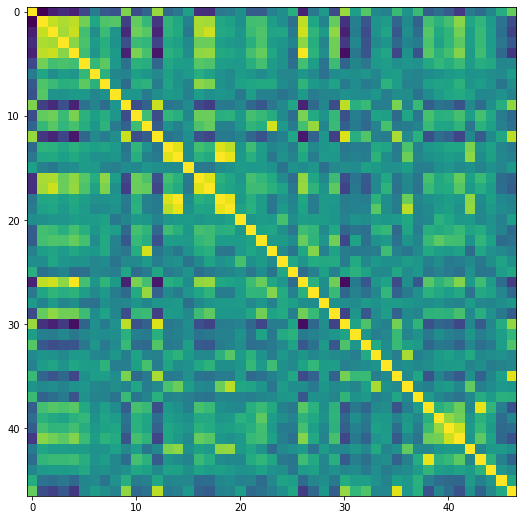

In [198]:
# what was I doing here? Trying to make the table above as a chart.  Too much data in the chart and too much dumb in Frank.
fig, ax = plt.subplots()
im = ax.imshow(working_data.corr())
plt.show()

A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.  

1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation

The r-squared is: 0.8233373547926196


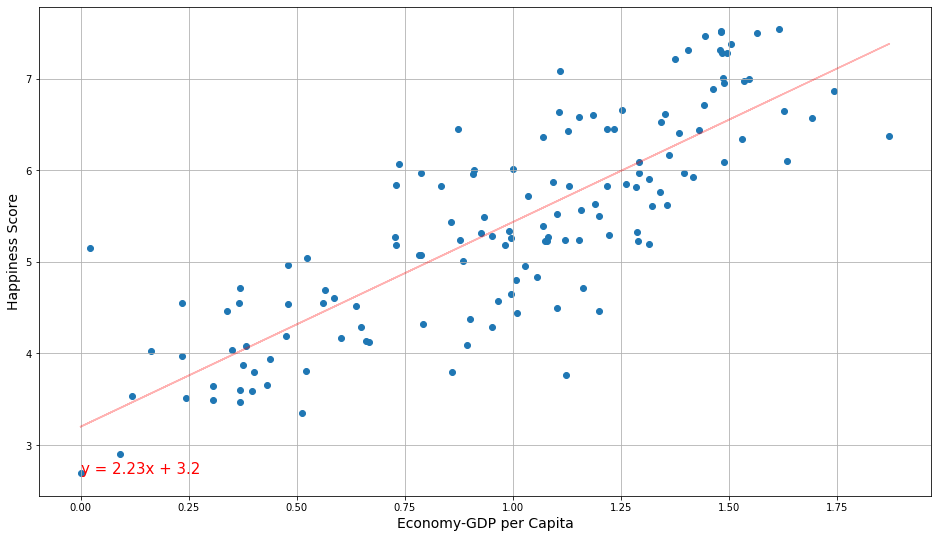

<Figure size 1152x648 with 0 Axes>

The correlation between both factors is 0.82


In [9]:
# there is a positive correlation between a countries happiness score and their GDP.  Happiness increases 
# with GDP increases

def linear_regres(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-",alpha=.30)
    plt.annotate(line_eq,xy=(x_values.min(),y_values.min()),fontsize=15,color="red") 
    plt.xlabel(x_values.name,fontsize=14)  
    plt.ylabel(y_values.name,fontsize=14)
    print(f"The r-squared is: {rvalue}")
    plt.grid()
    save_name = f"output/{x_values.name}_{y_values.name}.png"
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(save_name)
    plt.show()
  
x_values = working_data["Economy-GDP per Capita"]
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [8]:
# Looking at the world bank GDP per capita we see a simlar correlation for the happiness score 
# Money can buy happiness

The r-squared is: 0.7244945465791507


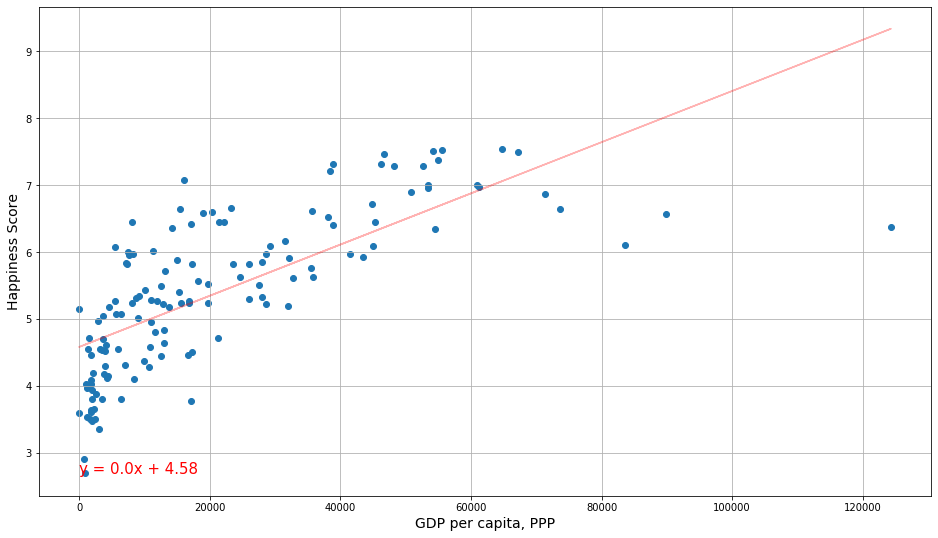

<Figure size 1152x648 with 0 Axes>

In [172]:
x_values = working_data["GDP per capita, PPP"]
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: 0.7977895236945474


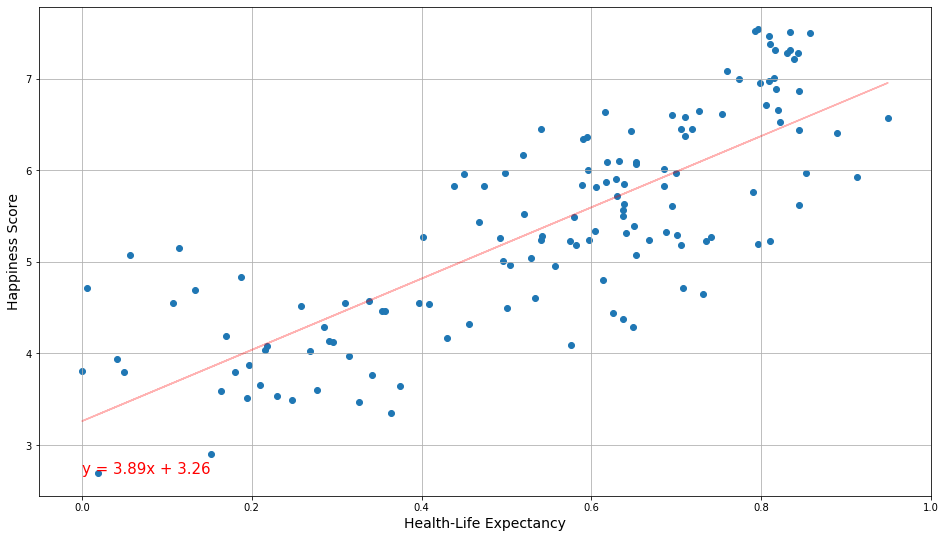

<Figure size 1152x648 with 0 Axes>

In [173]:
# We also see a similar correlation between the UN Life Expectancy and the World Bank Life expenctancy

x_values = working_data["Health-Life Expectancy"]
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: 0.805702783884598


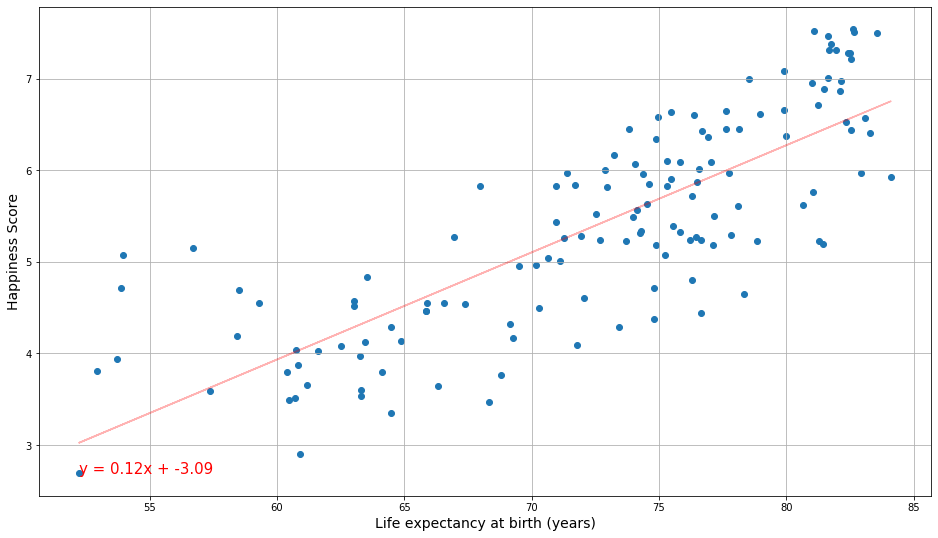

<Figure size 1152x648 with 0 Axes>

In [174]:
# We also see a similar correlation between the UN Life Expectancy and the World Bank Life expenctancy

x_values = working_data["Life expectancy at birth (years)"]
y_values = working_data["Happiness Score"]

linear_regres(x_values, y_values)

## It looks like the Happiness rankings are consistiant with the World bank Data

# So what else can the World Bank Data tell us about the happiest countries?

The r-squared is: -0.2582707930440319


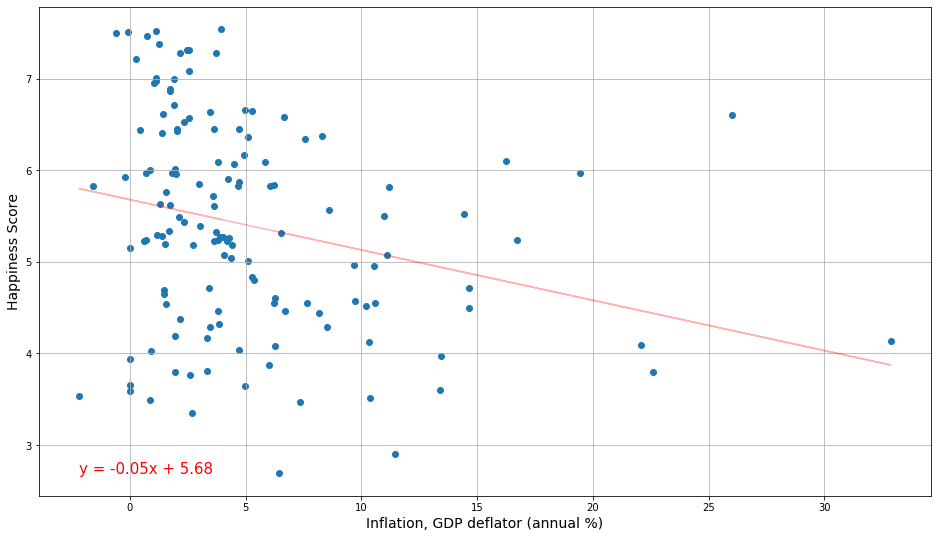

<Figure size 1152x648 with 0 Axes>

In [177]:
x_values = working_data['Inflation, GDP deflator (annual %)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: 0.31573181356509794


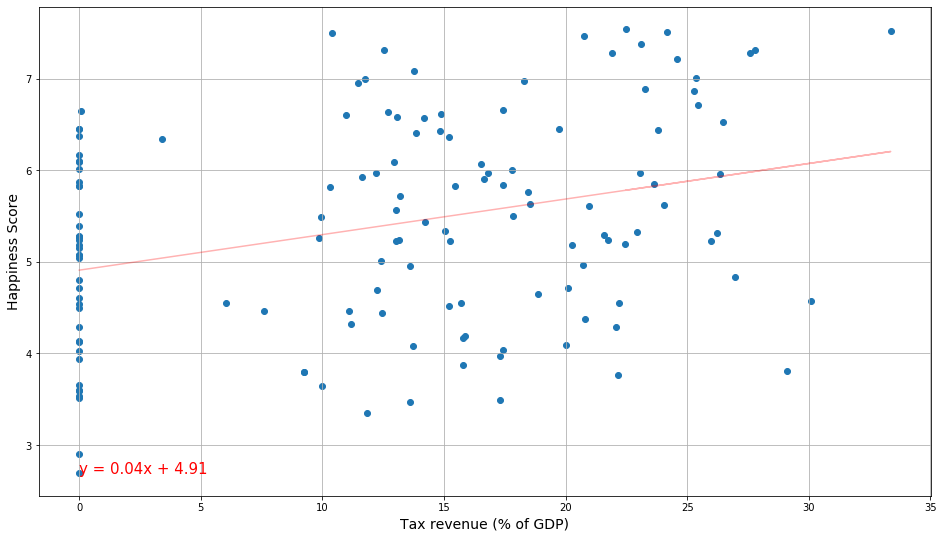

<Figure size 1152x648 with 0 Axes>

In [175]:
# something here?  Move up and line chart happy and sad?

x_values = working_data['Tax revenue (% of GDP)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

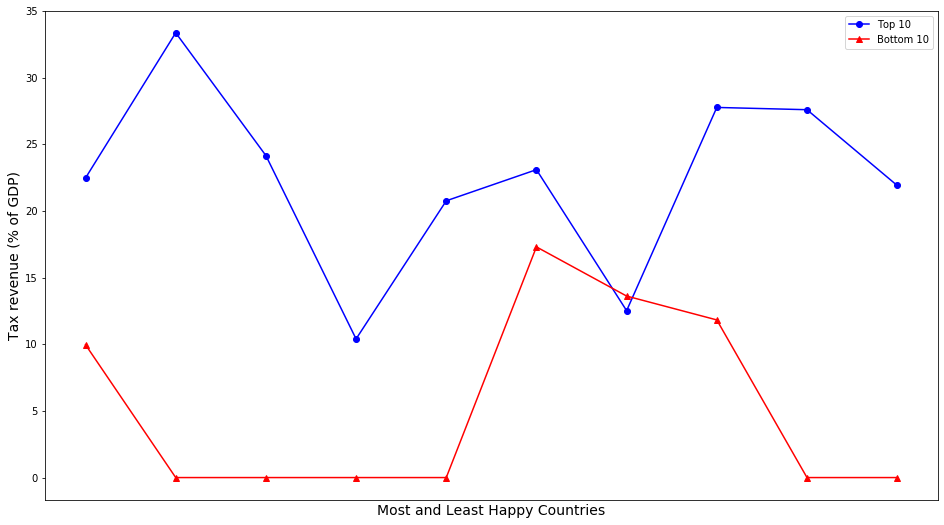

In [187]:
# 9 of the top 10 happiest cities have a large percentage of their GDP come from taxes

x_line = [0,1,2,3,4,5,6,7,8,9]
happy, = plt.plot(x_line, happiest['Tax revenue (% of GDP)'],color="blue", label="Top 10",marker ='o' )
sad, = plt.plot(x_line, saddest['Tax revenue (% of GDP)'],color="r", label="Bottom 10",marker ='^' )
plt.xticks([])
plt.legend(loc="best")
plt.xlabel("Most and Least Happy Countries",fontsize=14)
plt.ylabel("Tax revenue (% of GDP)",fontsize=14)
save_name = f"output/LINE_Tax revenue (% of GDP).png"
plt.savefig(save_name)
plt.show()

The r-squared is: 0.5285595551136129


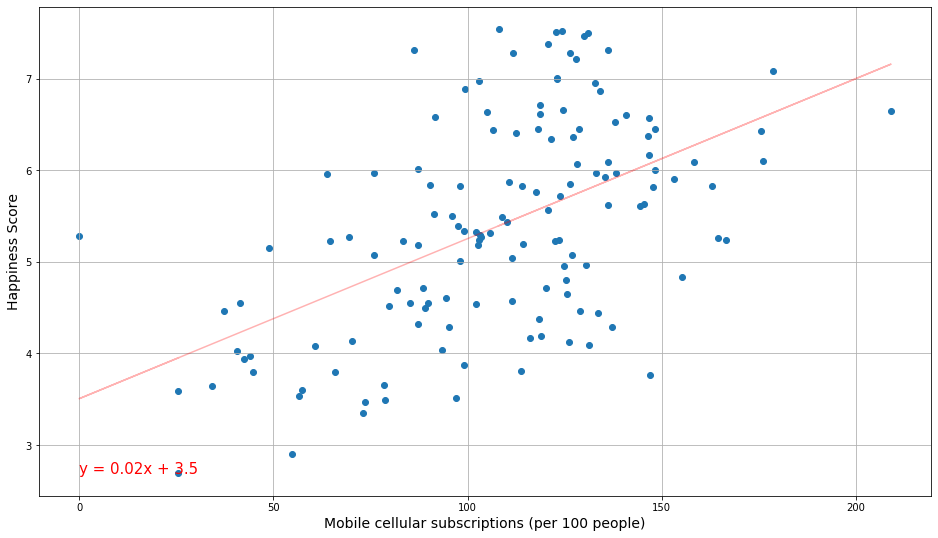

<Figure size 1152x648 with 0 Axes>

In [180]:
# Does your phone make you happy?

x_values = working_data['Mobile cellular subscriptions (per 100 people)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: -0.5114420225589001


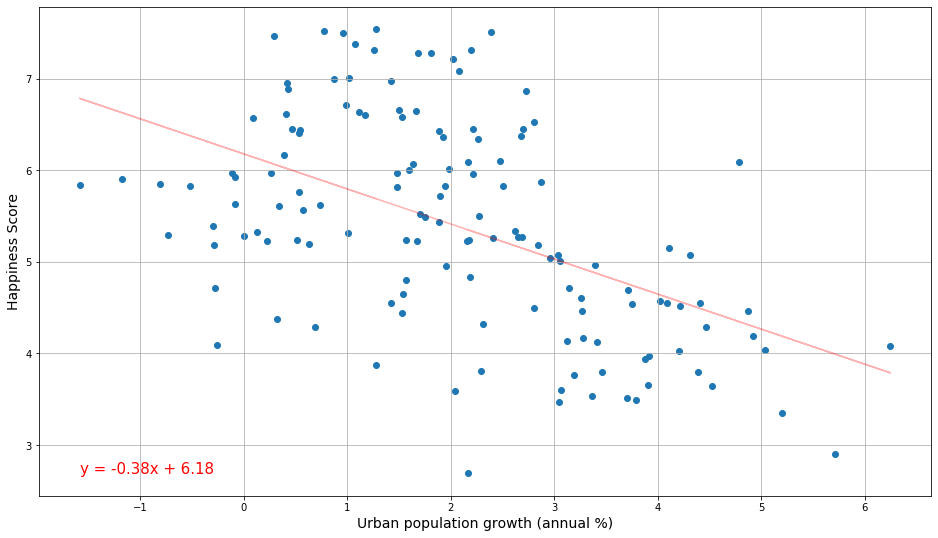

<Figure size 1152x648 with 0 Axes>

In [182]:
# as cities grow, happiness declines

x_values = working_data['Urban population growth (annual %)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: -0.6806624424792312


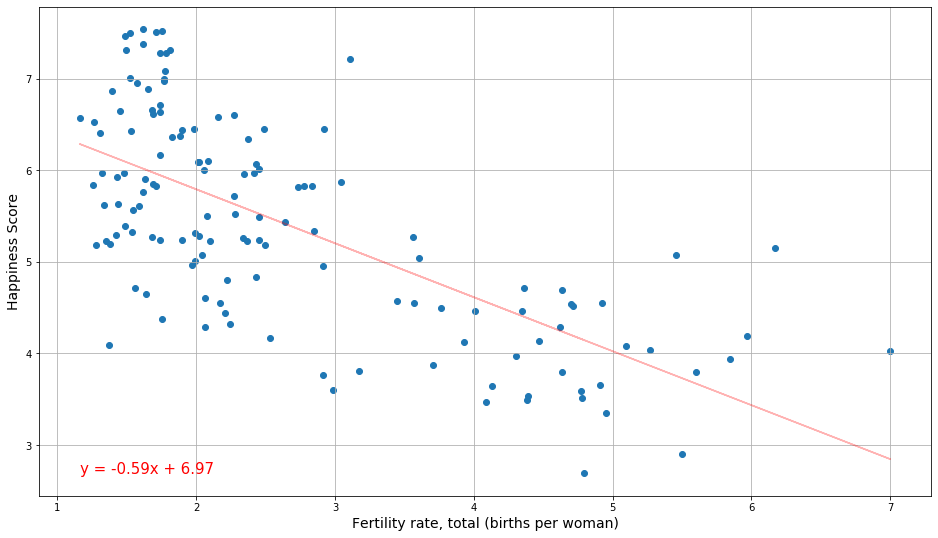

<Figure size 1152x648 with 0 Axes>

In [178]:
# The LOWER the fertility rate (number of births per woman) the hapier a country is
# the middle is clustered at less than 3 kids and the top 10 have between 1 and 2

x_values = working_data['Fertility rate, total (births per woman)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

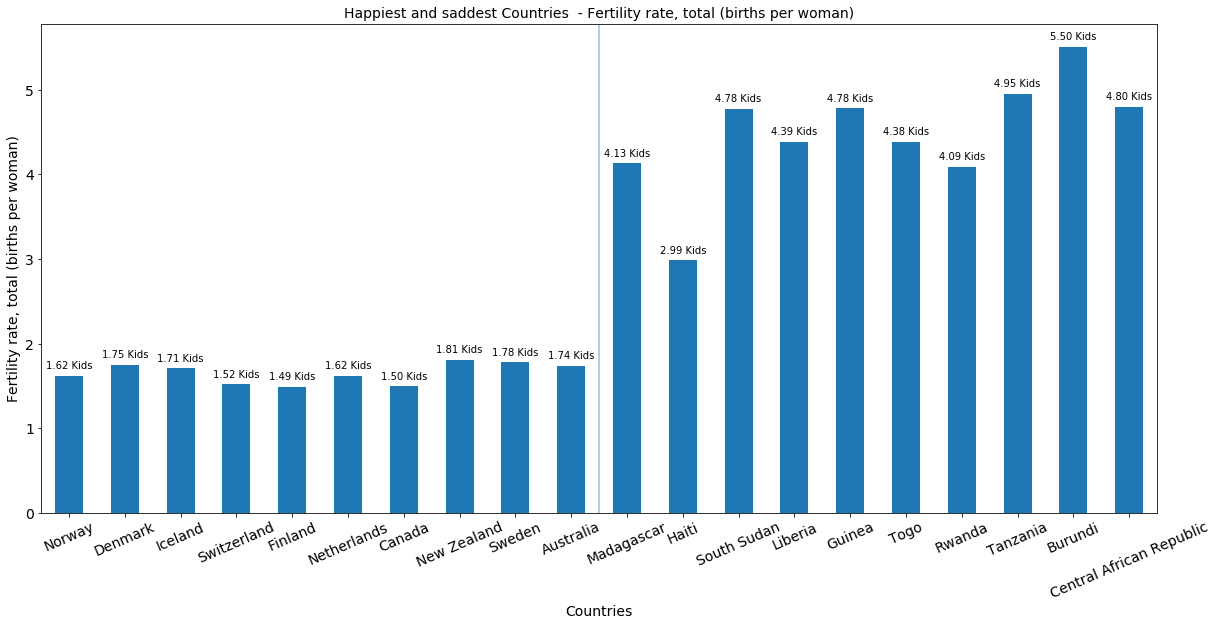

In [195]:
birth = t_and_b[["Country","Fertility rate, total (births per woman)"]]
#exports.iloc[:, 1] = exports.iloc[:, 1].astype(float)
birth = birth.set_index("Country")
ax=birth.plot(kind="bar", figsize=(20,9),rot=23.5,fontsize=14)
ax.get_legend().remove()
plt.title("Happiest and saddest Countries  - Fertility rate, total (births per woman)", fontsize=14)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Fertility rate, total (births per woman)", fontsize=14)
for p in ax.patches:
    ax.annotate("%.2f Kids" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.axvline(9.5,alpha=0.45)
save_name = f"output/BAR_Fertility rate.png"
plt.savefig(save_name)

The r-squared is: 0.0858664401306674


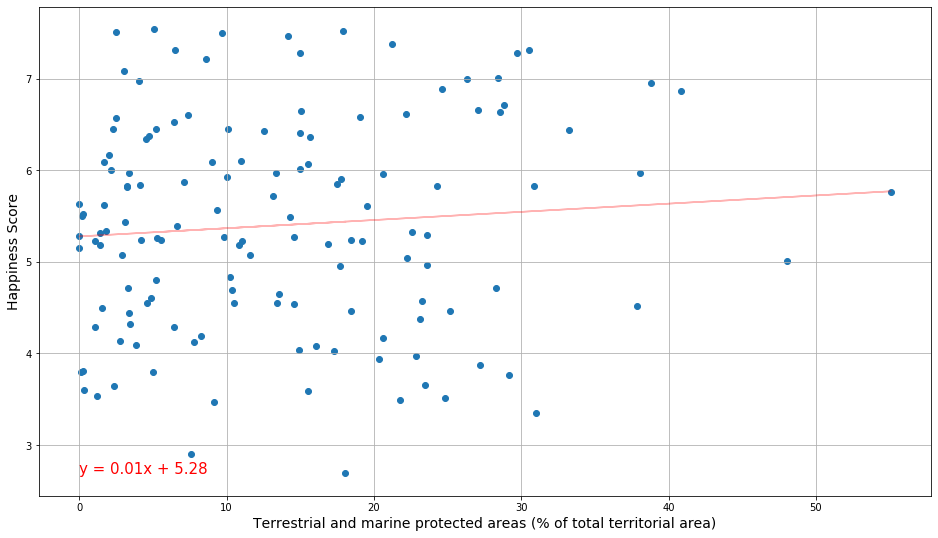

<Figure size 1152x648 with 0 Axes>

In [181]:
# environmentally protected areas do not seem to have much of an effect on happiness

x_values = working_data['Terrestrial and marine protected areas (% of total territorial area)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

Below I want to look at Imports and Exports as a percentage of trade (The data from the world bank is % of GDP).  It wound up being too much information for the report so I abandoned this part. (Healthy Trade is correlated with Higher happiness).

The r-squared is: 0.3380609331032011


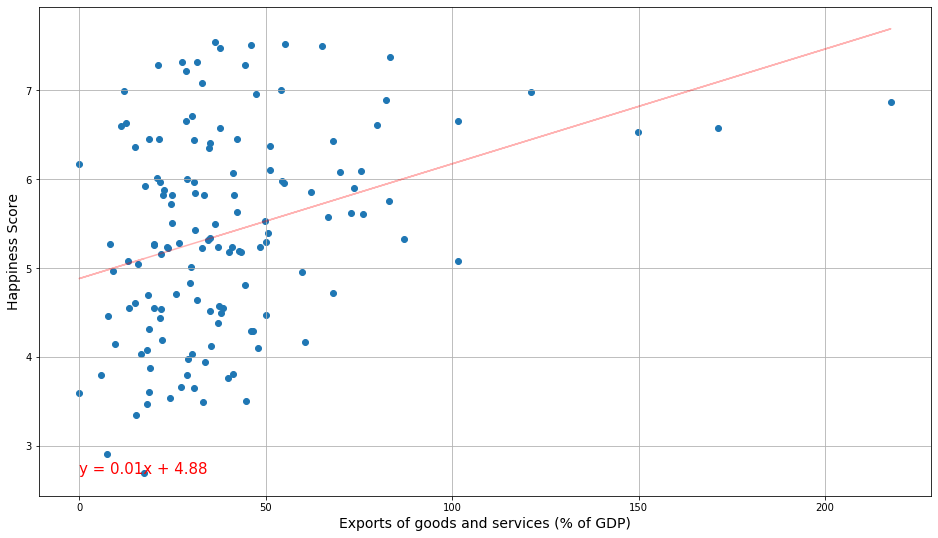

<Figure size 1152x648 with 0 Axes>

In [183]:
# Net exporters seem to be happier but are mostly all clustered below 50%:  Importing makes a country as happy as exporting?

# balance of trade is better
# no real effect?
x_values = working_data['Exports of goods and services (% of GDP)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: 0.11897328891475763


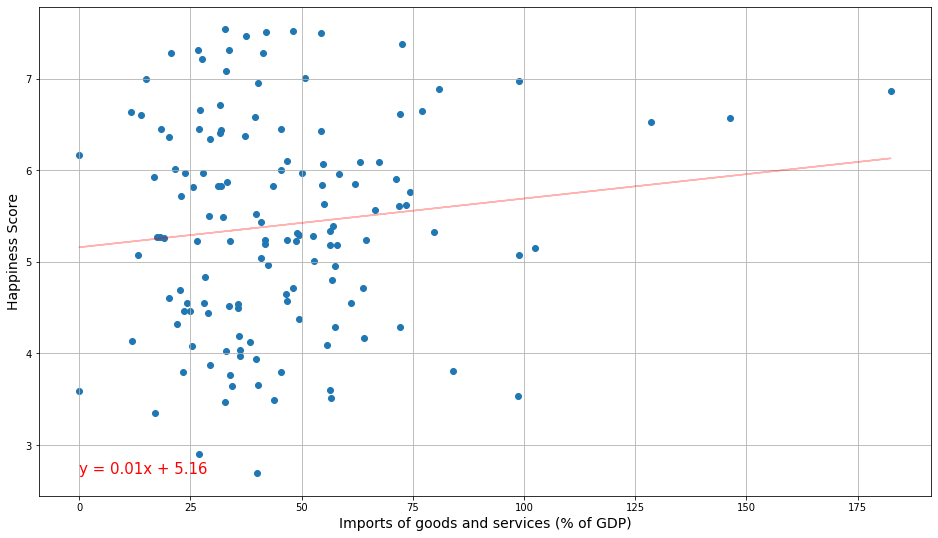

<Figure size 1152x648 with 0 Axes>

In [184]:
# importing has less corr with happiness than exports
x_values = working_data['Imports of goods and services (% of GDP)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: 0.11897328891475763


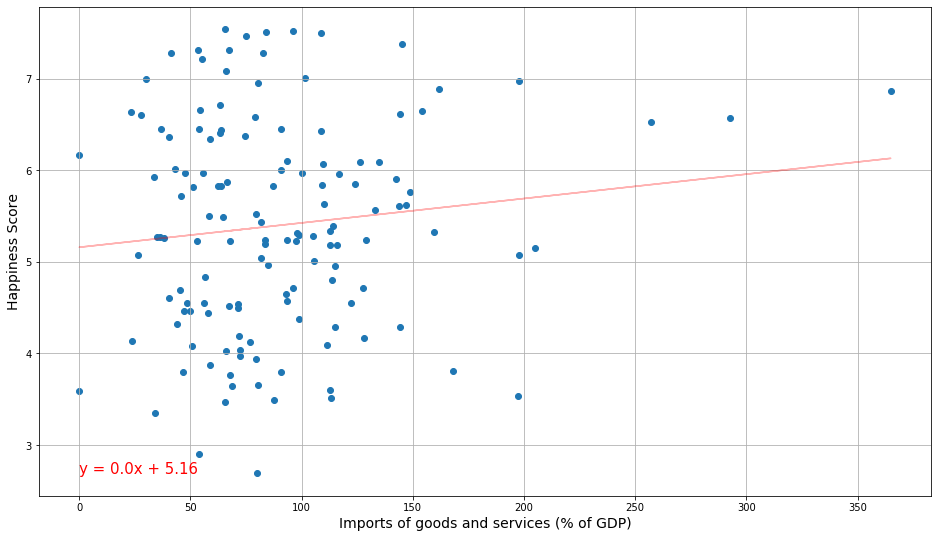

<Figure size 1152x648 with 0 Axes>

In [185]:
#How about total trade
x_values = working_data['Imports of goods and services (% of GDP)']+working_data['Imports of goods and services (% of GDP)']
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

The r-squared is: nan


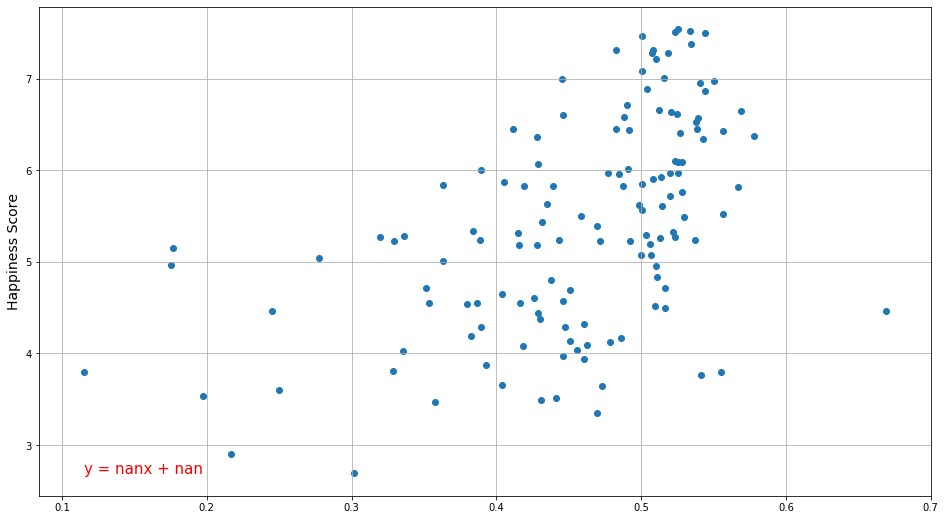

<Figure size 1152x648 with 0 Axes>

In [186]:
#How about esports as a percentage of total trade
total_trade = working_data['Imports of goods and services (% of GDP)']+working_data['Exports of goods and services (% of GDP)']
exp_oftrade = working_data['Exports of goods and services (% of GDP)']/total_trade
imp_oftrade = working_data['Imports of goods and services (% of GDP)']/total_trade
imp_oftrade

x_values = exp_oftrade
y_values = working_data["Happiness Score"]
linear_regres(x_values, y_values)

#get line?
#correlation = st.pearsonr(exp_oftrade,working_data["Happiness Score"])